In [17]:
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torchvision import transforms, utils
import torch.nn as nn
from torch.autograd import Variable
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F
from utils import ImageDataset, view_data_rand
from shabaka_net import ShabakaNet

# Importing the dataset

In [9]:
train_image = pd.read_csv("../dataset/csvTrainImages 13440x1024.csv", header = None)
train_label = pd.read_csv("../dataset/csvTrainLabel 13440x1.csv", header = None)
test_image = pd.read_csv("../dataset/csvTestImages 3360x1024.csv", header = None )
test_label = pd.read_csv("../dataset/csvTestLabel 3360x1.csv", header = None )

train_image['label'] = train_label
test_image['label'] = test_label

# Preparing the Dataloader and the Dataset and Visualising a few samples

In [11]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=(0.5,), std=(0.5,))])
train_image_dataset = ImageDataset(train_image, transform)

In [13]:
loader = DataLoader(train_image_dataset, batch_size= 32, shuffle=True)

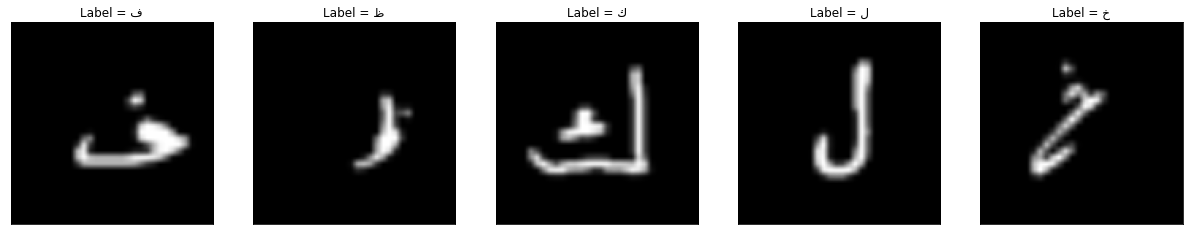

In [16]:
plts = view_data_rand(loader, n=5)

# Training

- Training parameters:

In [18]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
num_epochs = 20
learning_rate = 0.001
total_step = len(loader)
loss_list = []
acc_list = []
model = ShabakaNet()
model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate);
criterion = nn.CrossEntropyLoss();

- Training loop:

In [19]:
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(loader):
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss_list.append(loss.item())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total = labels.size(0)
        _, predicted = torch.max(outputs.data, 1)
        correct = (predicted == labels).sum().item()
        acc_list.append(correct / total)

        if (i + 1) % 100 == 0:
            print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                  .format(epoch + 1, num_epochs, i + 1, total_step, loss.item(),
                          (correct / total) * 100))

Epoch [1/15], Step [100/420], Loss: 2.1033, Accuracy: 37.50%
Epoch [1/15], Step [200/420], Loss: 1.6275, Accuracy: 43.75%
Epoch [1/15], Step [300/420], Loss: 1.1852, Accuracy: 62.50%
Epoch [1/15], Step [400/420], Loss: 0.8884, Accuracy: 68.75%
Epoch [2/15], Step [100/420], Loss: 0.5084, Accuracy: 84.38%
Epoch [2/15], Step [200/420], Loss: 0.2700, Accuracy: 90.62%
Epoch [2/15], Step [300/420], Loss: 0.5987, Accuracy: 78.12%
Epoch [2/15], Step [400/420], Loss: 0.6149, Accuracy: 84.38%
Epoch [3/15], Step [100/420], Loss: 0.2668, Accuracy: 87.50%
Epoch [3/15], Step [200/420], Loss: 0.1961, Accuracy: 90.62%
Epoch [3/15], Step [300/420], Loss: 0.2553, Accuracy: 87.50%
Epoch [3/15], Step [400/420], Loss: 0.2349, Accuracy: 90.62%
Epoch [4/15], Step [100/420], Loss: 0.5975, Accuracy: 90.62%
Epoch [4/15], Step [200/420], Loss: 0.1592, Accuracy: 93.75%
Epoch [4/15], Step [300/420], Loss: 0.1716, Accuracy: 93.75%
Epoch [4/15], Step [400/420], Loss: 0.4490, Accuracy: 90.62%
Epoch [5/15], Step [100/

# Evaluating the model

In [21]:
test_image_dataset = ImageDataset(test_image, transform)
test_loader = DataLoader(test_image_dataset, batch_size= 1, shuffle=False)
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    for (images, labels) in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the 3360 test images: {} %'.format((correct / total) * 100))

#Save the model and plot
torch.save(model.state_dict(), 'shabakanet.pt')

Test Accuracy of the model on the 3360 test images: 93.57142857142857 %
